## Comparing the clean and incremental build time of a system on its different configurations

In [61]:
import pandas as pd
import numpy as np

# Will show the clean build time and the executable's binary size for all system's configurations
path = '/home/xternava/Documents/GitHub/Incremental-build/data/'
#path = '/src/data/'
df1 = pd.read_csv(path + 'clean-bt.csv', converters={'BranchC': lambda x: str(x)})
df2 = pd.read_csv(path + 'incremental-bt.csv', converters={'Br2': lambda x: str(x)})

df1 = df1.rename(columns = {"BranchC": "Branch", "Build Time": "Clean Build Time"})
df2 = df2.rename(columns = {"Br2": "Branch", 
                            "max": "Max Inc. Build Time", 
                            "mean": "Mean Inc. Build Time",
                            "min": "Min Inc. Build Time"})
df3 = pd.merge(df1, df2) 
df3.round(decimals=2)


,Branch,Clean Build Time,Binary Size,Max Inc. Build Time,Mean Inc. Build Time,Min Inc. Build Time
0,00001,33.02,1763616,20.97,18.47,17.37
1,00002,68.15,2841120,42.64,39.94,37.22
2,00003,4.34,1564256,4.63,4.27,4.07
3,00004,33.82,2175400,7.82,7.35,7.03
4,00005,29.60,1730208,21.64,18.58,17.43
5,00006,36.40,1914016,25.96,23.63,22.12
6,00007,25.45,1700456,5.79,5.40,5.14
7,00008,16.48,1488568,4.82,3.95,3.74
8,00009,37.93,1938976,26.18,24.06,22.19
9,00010,32.48,1725056,20.04,18.28,16.97


In [62]:
df2['Time Diff. %'] = (1 - (df2['Min Inc. Build Time'] / df1['Clean Build Time'])) * 100
df4 = pd.merge(df1[["Branch", "Clean Build Time"]], 
                df2[["Branch", "Min Inc. Build Time", "Time Diff. %"]]) 
df4 = df4.round(decimals=2).sort_values(by = "Time Diff. %", ascending=False)

df4

,Branch,Clean Build Time,Min Inc. Build Time,Time Diff. %
14,00015,31.22,5.92,81.04
13,00014,39.08,7.67,80.38
6,00007,25.45,5.14,79.82
3,00004,33.82,7.03,79.21
16,00017,17.36,3.73,78.53
7,00008,16.48,3.74,77.30
9,00010,32.48,16.97,47.76
0,00001,33.02,17.37,47.38
15,00016,74.34,39.18,47.30
1,00002,68.15,37.22,45.38


In [66]:
# Extracting only the first and last 5 extreme differences in build time
df5 = df4[: 5]
df6 = df4[-5:]
df7 = df5.append(df6)
df7

,Branch,Clean Build Time,Min Inc. Build Time,Time Diff. %
14,00015,31.22,5.92,81.04
13,00014,39.08,7.67,80.38
6,00007,25.45,5.14,79.82
3,00004,33.82,7.03,79.21
16,00017,17.36,3.73,78.53
10,00011,24.22,22.19,8.36
2,00003,4.34,4.07,6.09
11,00012,4.33,4.08,5.89
19,00020,1.82,4.88,-167.46
12,00013,1.77,4.79,-170.80


<AxesSubplot:xlabel='Configurations', ylabel='Diff. of build time [%]'>

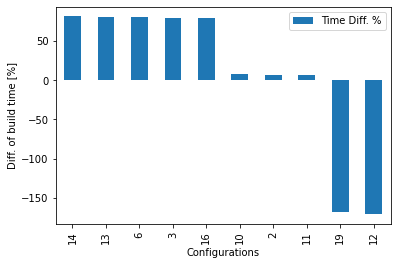

In [69]:
# Visualized the minimum, maxium, and average incremental build time for all configurations
import matplotlib.pyplot as plt

ib_plot = df7[["Branch", "Time Diff. %"]].plot(kind='bar')

ib_plot.set_xlabel("Configurations")
ib_plot.set_ylabel("Diff. of build time [%]")

#ib_plot.tight_layout(pad=1.0)
plt.savefig("./figures/fig03.pdf", bbox_inches = 'tight', pad_inches = 0)

ib_plot